# Rice Leaf Diseaes Detection

 ## Divided project into multiple steps
 * Importing Libraries
 * Data Augmentation & Split data Train,Test set
 * Model Building
 * Model Evaluate 
 * Make Prediction 
 * Single image Prediction

In [1]:
!pip install split_folders

In [2]:
import splitfolders

In [3]:
splitfolders.ratio("Data", output="splitfolders2", seed=1337, ratio=(0.7,0.2,0.1))

Copying files: 119 files [00:01, 89.75 files/s]


### Importing Librairies

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models ,layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dropout,BatchNormalization
from keras.callbacks import ModelCheckpoint
from PIL import Image

### Data Argumnents & split train,test,validation

In [5]:
batch_size=32
image_size=(128,128)
class_mode="sparse"

train_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,    
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
)

train_dataset=train_datagen.flow_from_directory(
    "splitdata2/train",
    target_size=image_size,
    batch_size=batch_size,
    seed=42,
    class_mode=class_mode     #"binary": binary targets (if there are only two classes),"categorical": categorical targets,
)                           #"sparse": integer targets,
    

test_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

val_dataset=test_datagen.flow_from_directory(
    directory="splitdata2/val",
    batch_size=batch_size,
    target_size=image_size,
    seed=42,
    class_mode=class_mode,
)

test_dataset=test_datagen.flow_from_directory(
    directory="splitdata2/test",
    batch_size=batch_size,
    target_size=image_size,
    seed=42,
    class_mode=class_mode,
)



Found 83 images belonging to 3 classes.
Found 23 images belonging to 3 classes.
Found 13 images belonging to 3 classes.


In [6]:
for image_batch, label_batch in train_dataset:
    print(image_batch[0])
    break
    

[[[0.26884177 0.25882354 0.01459873]
  [0.24311204 0.25881094 0.02743837]
  [0.21738233 0.24594608 0.01457352]
  ...
  [0.32639444 0.29307088 0.09842464]
  [0.31733394 0.28211856 0.0917208 ]
  [0.31108764 0.27089232 0.09470459]]

 [[0.27210334 0.2582316  0.0106003 ]
  [0.24796551 0.25952333 0.02783596]
  [0.22809681 0.25237983 0.02169558]
  ...
  [0.33434573 0.2977573  0.11833217]
  [0.32289007 0.29182994 0.11185134]
  [0.31854466 0.28922135 0.11452324]]

 [[0.28710607 0.2679949  0.01995167]
  [0.26586634 0.26906776 0.02847169]
  [0.24952957 0.2619424  0.023973  ]
  ...
  [0.33014348 0.2987031  0.12236059]
  [0.32166418 0.29437542 0.11993364]
  [0.317717   0.29175243 0.10558154]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


In [7]:
labels=train_dataset.class_indices
print(labels)
class_names = list(train_dataset.class_indices.keys())
print(class_names)

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}
['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [8]:
print(len(train_dataset))
print(len(test_dataset))
print(len(val_dataset))

3
1
1


In [9]:
for image_batch, lable_batch in train_dataset:
    print(image_batch.shape)
    print(lable_batch)
    break

(32, 128, 128, 3)
[0. 2. 1. 0. 2. 0. 1. 0. 2. 0. 0. 1. 0. 2. 0. 1. 2. 2. 1. 1. 2. 0. 0. 1.
 0. 1. 0. 1. 2. 2. 2. 0.]


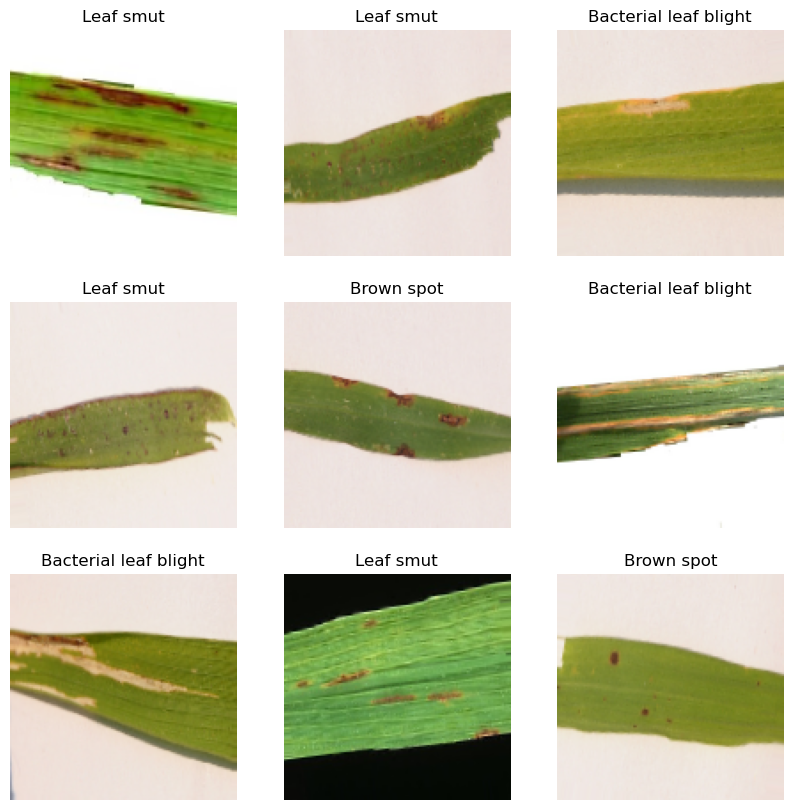

In [10]:
plt.figure(figsize=(10,10))
for images, labels in test_dataset:
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names [int(labels[i])])
        plt.axis("off")
    break
        

# Model Building

In [11]:
model=Sequential()
#convulation layer
model.add(Conv2D(32,(4,4),padding="same",input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(BatchNormalization())


model.add(Conv2D(64,(4,4),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())


model.add(Conv2D(64,(4,4),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())

model.add(Conv2D(64,(4,4),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())

model.add(Conv2D(64,(4,4),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(50,activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(3,activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

#### checkpoint

In [12]:
filepath="trained_model.h6"
checkpoint=ModelCheckpoint(filepath,monitor='val_Accuracy',verbose=1,save_best_only=True,mode="max")
callback_list=[checkpoint]

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["Accuracy"]
              )

In [17]:
history = model.fit(train_dataset,
                    epochs=100,
                    steps_per_epoch=83,
                    validation_data=val_dataset,
                    validation_steps=23,
                    workers=4,
                    callbacks=callback_list)




Epoch 1/100
83/83 [==============================] - ETA: 0s - loss: 0.9950 - Accuracy: 0.4833
Epoch 1: val_Accuracy improved from -inf to 0.66730, saving model to trained_model.h6


INFO:tensorflow:Assets written to: trained_model.h6\assets


INFO:tensorflow:Assets written to: trained_model.h6\assets


83/83 [==============================] - 98s 1s/step - loss: 0.9950 - Accuracy: 0.4833 - val_loss: 0.8735 - val_Accuracy: 0.6673
Epoch 2/100
83/83 [==============================] - ETA: 0s - loss: 0.6809 - Accuracy: 0.7280
Epoch 2: val_Accuracy did not improve from 0.66730
83/83 [==============================] - 98s 1s/step - loss: 0.6809 - Accuracy: 0.7280 - val_loss: 0.7256 - val_Accuracy: 0.6578
Epoch 3/100
83/83 [==============================] - ETA: 0s - loss: 0.5269 - Accuracy: 0.7701
Epoch 3: val_Accuracy improved from 0.66730 to 0.70699, saving model to trained_model.h6


INFO:tensorflow:Assets written to: trained_model.h6\assets


INFO:tensorflow:Assets written to: trained_model.h6\assets


83/83 [==============================] - 102s 1s/step - loss: 0.5269 - Accuracy: 0.7701 - val_loss: 0.9110 - val_Accuracy: 0.7070
Epoch 4/100
83/83 [==============================] - ETA: 0s - loss: 0.4739 - Accuracy: 0.7954
Epoch 4: val_Accuracy improved from 0.70699 to 0.71456, saving model to trained_model.h6


INFO:tensorflow:Assets written to: trained_model.h6\assets


INFO:tensorflow:Assets written to: trained_model.h6\assets


83/83 [==============================] - 98s 1s/step - loss: 0.4739 - Accuracy: 0.7954 - val_loss: 0.6861 - val_Accuracy: 0.7146
Epoch 5/100
83/83 [==============================] - ETA: 0s - loss: 0.3705 - Accuracy: 0.8512
Epoch 5: val_Accuracy improved from 0.71456 to 0.80529, saving model to trained_model.h6


INFO:tensorflow:Assets written to: trained_model.h6\assets


INFO:tensorflow:Assets written to: trained_model.h6\assets


83/83 [==============================] - 98s 1s/step - loss: 0.3705 - Accuracy: 0.8512 - val_loss: 0.3970 - val_Accuracy: 0.8053
Epoch 6/100
83/83 [==============================] - ETA: 0s - loss: 0.2709 - Accuracy: 0.8980
Epoch 6: val_Accuracy did not improve from 0.80529
83/83 [==============================] - 97s 1s/step - loss: 0.2709 - Accuracy: 0.8980 - val_loss: 0.4802 - val_Accuracy: 0.7675
Epoch 7/100
83/83 [==============================] - ETA: 0s - loss: 0.1780 - Accuracy: 0.9411
Epoch 7: val_Accuracy did not improve from 0.80529
83/83 [==============================] - 97s 1s/step - loss: 0.1780 - Accuracy: 0.9411 - val_loss: 0.5220 - val_Accuracy: 0.7977
Epoch 8/100
83/83 [==============================] - ETA: 0s - loss: 0.1717 - Accuracy: 0.9407
Epoch 8: val_Accuracy did not improve from 0.80529
83/83 [==============================] - 97s 1s/step - loss: 0.1717 - Accuracy: 0.9407 - val_loss: 0.8478 - val_Accuracy: 0.7580
Epoch 9/100
83/83 [===========================

INFO:tensorflow:Assets written to: trained_model.h6\assets


INFO:tensorflow:Assets written to: trained_model.h6\assets


83/83 [==============================] - 100s 1s/step - loss: 0.1760 - Accuracy: 0.9436 - val_loss: 0.4806 - val_Accuracy: 0.8998
Epoch 11/100
83/83 [==============================] - ETA: 0s - loss: 0.0526 - Accuracy: 0.9822
Epoch 11: val_Accuracy did not improve from 0.89981
83/83 [==============================] - 98s 1s/step - loss: 0.0526 - Accuracy: 0.9822 - val_loss: 0.4537 - val_Accuracy: 0.7940
Epoch 12/100
83/83 [==============================] - ETA: 0s - loss: 0.1274 - Accuracy: 0.9584
Epoch 12: val_Accuracy did not improve from 0.89981
83/83 [==============================] - 96s 1s/step - loss: 0.1274 - Accuracy: 0.9584 - val_loss: 0.6592 - val_Accuracy: 0.8299
Epoch 13/100
83/83 [==============================] - ETA: 0s - loss: 0.0589 - Accuracy: 0.9809
Epoch 13: val_Accuracy improved from 0.89981 to 0.91115, saving model to trained_model.h6


INFO:tensorflow:Assets written to: trained_model.h6\assets


INFO:tensorflow:Assets written to: trained_model.h6\assets


83/83 [==============================] - 99s 1s/step - loss: 0.0589 - Accuracy: 0.9809 - val_loss: 0.6826 - val_Accuracy: 0.9112
Epoch 14/100
83/83 [==============================] - ETA: 0s - loss: 0.0455 - Accuracy: 0.9843
Epoch 14: val_Accuracy did not improve from 0.91115
83/83 [==============================] - 96s 1s/step - loss: 0.0455 - Accuracy: 0.9843 - val_loss: 0.6602 - val_Accuracy: 0.8072
Epoch 15/100
83/83 [==============================] - ETA: 0s - loss: 0.0625 - Accuracy: 0.9804
Epoch 15: val_Accuracy did not improve from 0.91115
83/83 [==============================] - 97s 1s/step - loss: 0.0625 - Accuracy: 0.9804 - val_loss: 0.5739 - val_Accuracy: 0.7958
Epoch 16/100
83/83 [==============================] - ETA: 0s - loss: 0.0457 - Accuracy: 0.9861
Epoch 16: val_Accuracy did not improve from 0.91115
83/83 [==============================] - 98s 1s/step - loss: 0.0457 - Accuracy: 0.9861 - val_loss: 0.8757 - val_Accuracy: 0.7543
Epoch 17/100
83/83 [====================

INFO:tensorflow:Assets written to: trained_model.h6\assets


INFO:tensorflow:Assets written to: trained_model.h6\assets


83/83 [==============================] - 100s 1s/step - loss: 0.0171 - Accuracy: 0.9943 - val_loss: 0.4300 - val_Accuracy: 0.9130
Epoch 20/100
83/83 [==============================] - ETA: 0s - loss: 0.1387 - Accuracy: 0.9520
Epoch 20: val_Accuracy did not improve from 0.91304
83/83 [==============================] - 99s 1s/step - loss: 0.1387 - Accuracy: 0.9520 - val_loss: 0.5852 - val_Accuracy: 0.8336
Epoch 21/100
83/83 [==============================] - ETA: 0s - loss: 0.0528 - Accuracy: 0.9786
Epoch 21: val_Accuracy did not improve from 0.91304
83/83 [==============================] - 98s 1s/step - loss: 0.0528 - Accuracy: 0.9786 - val_loss: 0.7443 - val_Accuracy: 0.8280
Epoch 22/100
83/83 [==============================] - ETA: 0s - loss: 0.0517 - Accuracy: 0.9799
Epoch 22: val_Accuracy did not improve from 0.91304
83/83 [==============================] - 99s 1s/step - loss: 0.0517 - Accuracy: 0.9799 - val_loss: 0.8580 - val_Accuracy: 0.8639
Epoch 23/100
83/83 [===================

INFO:tensorflow:Assets written to: trained_model.h6\assets


INFO:tensorflow:Assets written to: trained_model.h6\assets


83/83 [==============================] - 96s 1s/step - loss: 0.0019 - Accuracy: 1.0000 - val_loss: 0.9945 - val_Accuracy: 0.9376
Epoch 33/100
83/83 [==============================] - ETA: 0s - loss: 0.1052 - Accuracy: 0.9751
Epoch 33: val_Accuracy did not improve from 0.93762
83/83 [==============================] - 97s 1s/step - loss: 0.1052 - Accuracy: 0.9751 - val_loss: 0.7006 - val_Accuracy: 0.8223
Epoch 34/100
83/83 [==============================] - ETA: 0s - loss: 0.0103 - Accuracy: 0.9974
Epoch 34: val_Accuracy did not improve from 0.93762
83/83 [==============================] - 99s 1s/step - loss: 0.0103 - Accuracy: 0.9974 - val_loss: 0.6995 - val_Accuracy: 0.8771
Epoch 35/100
83/83 [==============================] - ETA: 0s - loss: 0.0403 - Accuracy: 0.9913
Epoch 35: val_Accuracy did not improve from 0.93762
83/83 [==============================] - 99s 1s/step - loss: 0.0403 - Accuracy: 0.9913 - val_loss: 1.3004 - val_Accuracy: 0.7826
Epoch 36/100
83/83 [====================

Epoch 62/100
83/83 [==============================] - ETA: 0s - loss: 2.6510e-04 - Accuracy: 1.0000
Epoch 62: val_Accuracy did not improve from 0.93762
83/83 [==============================] - 100s 1s/step - loss: 2.6510e-04 - Accuracy: 1.0000 - val_loss: 0.8214 - val_Accuracy: 0.8393
Epoch 63/100
83/83 [==============================] - ETA: 0s - loss: 0.0141 - Accuracy: 0.9983
Epoch 63: val_Accuracy did not improve from 0.93762
83/83 [==============================] - 100s 1s/step - loss: 0.0141 - Accuracy: 0.9983 - val_loss: 1.5345 - val_Accuracy: 0.8185
Epoch 64/100
83/83 [==============================] - ETA: 0s - loss: 0.1415 - Accuracy: 0.9597
Epoch 64: val_Accuracy did not improve from 0.93762
83/83 [==============================] - 99s 1s/step - loss: 0.1415 - Accuracy: 0.9597 - val_loss: 0.6415 - val_Accuracy: 0.8658
Epoch 65/100
83/83 [==============================] - ETA: 0s - loss: 0.0076 - Accuracy: 0.9987
Epoch 65: val_Accuracy did not improve from 0.93762
83/83 [====

83/83 [==============================] - ETA: 0s - loss: 0.0030 - Accuracy: 0.9991
Epoch 91: val_Accuracy did not improve from 0.93762
83/83 [==============================] - 98s 1s/step - loss: 0.0030 - Accuracy: 0.9991 - val_loss: 1.2057 - val_Accuracy: 0.8469
Epoch 92/100
83/83 [==============================] - ETA: 0s - loss: 1.1728e-04 - Accuracy: 1.0000
Epoch 92: val_Accuracy did not improve from 0.93762
83/83 [==============================] - 98s 1s/step - loss: 1.1728e-04 - Accuracy: 1.0000 - val_loss: 0.9572 - val_Accuracy: 0.8469
Epoch 93/100
83/83 [==============================] - ETA: 0s - loss: 0.0267 - Accuracy: 0.9939
Epoch 93: val_Accuracy did not improve from 0.93762
83/83 [==============================] - 97s 1s/step - loss: 0.0267 - Accuracy: 0.9939 - val_loss: 0.6676 - val_Accuracy: 0.8526
Epoch 94/100
83/83 [==============================] - ETA: 0s - loss: 0.0065 - Accuracy: 0.9983
Epoch 94: val_Accuracy did not improve from 0.93762
83/83 [===================

# Model evaluate

In [31]:
from keras.models import load_model
model = load_model("trained_model.h6")
score = model.evaluate(test_dataset, verbose=0)
print("validation loss:" , score[0])
print("validation accuracy", score[1])

validation loss: 4.461690902709961
validation accuracy 0.7692307829856873


In [32]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 83}

In [33]:
history.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

In [34]:
loss=history.history['loss']

val_loss=history.history['val_loss']

acc=history.history['Accuracy']

val_acc=history.history['val_Accuracy']

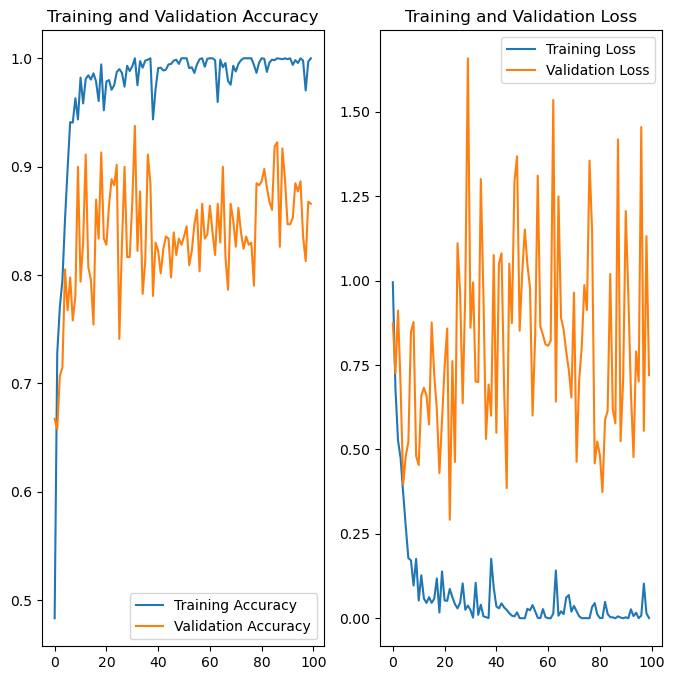

In [35]:

epoch=100
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epoch), acc, label='Training Accuracy')
plt.plot(range(epoch), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epoch), loss, label='Training Loss')
plt.plot(range(epoch), val_loss, label='Validation Loss')
plt.legend(loc='upper right')


plt.title('Training and Validation Loss')
plt.show()

# Make predictions

1/1 [==============================] - 0s 22ms/step


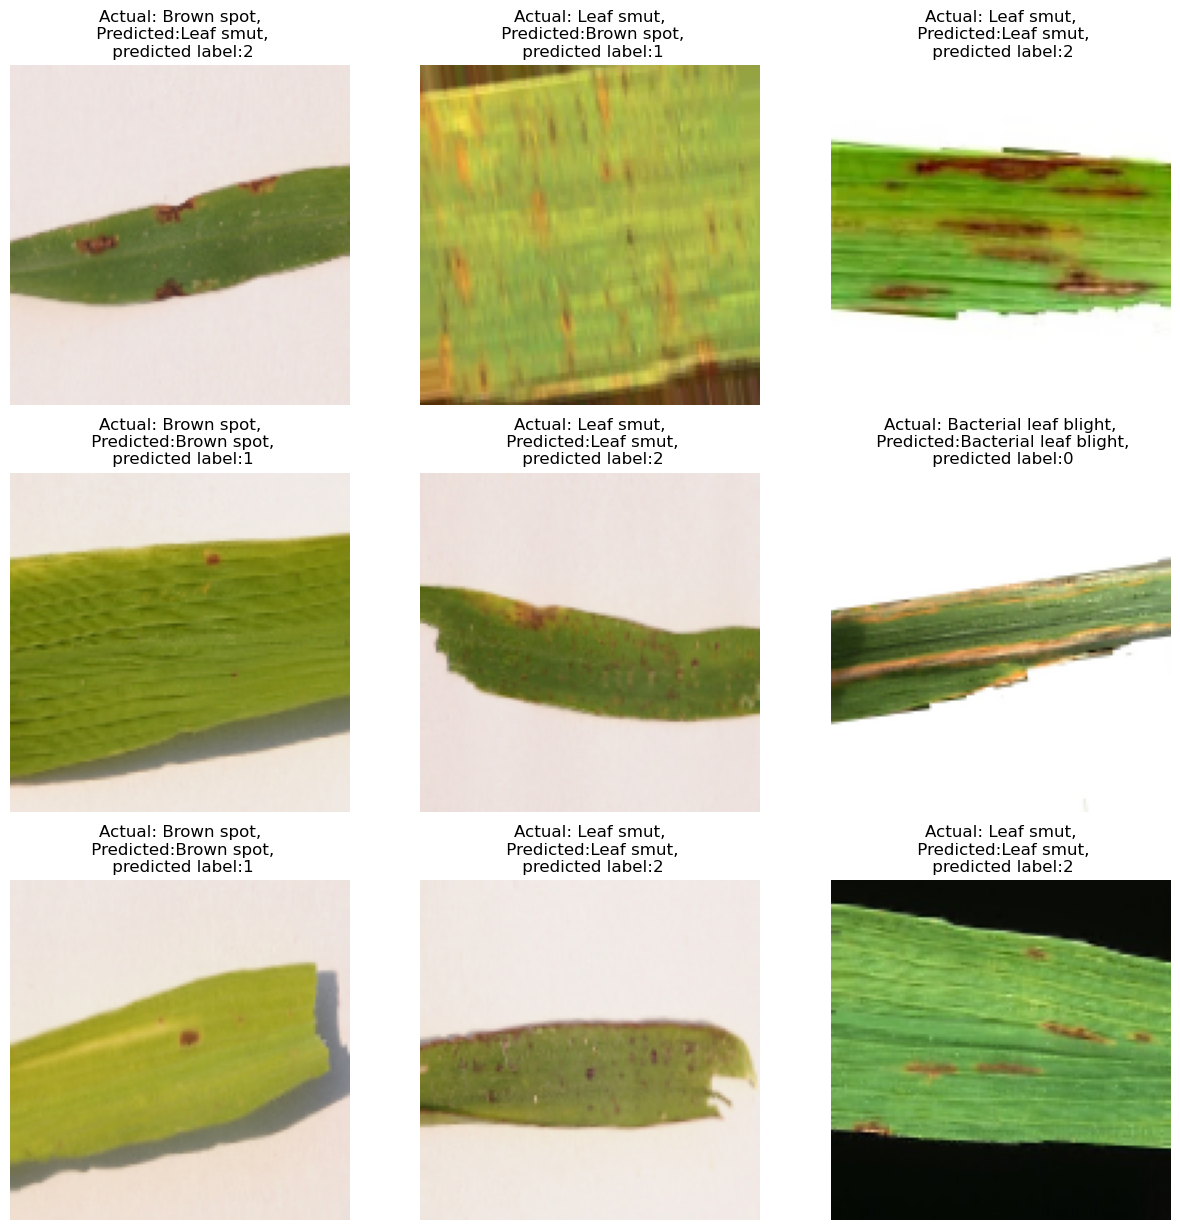

In [36]:
plt.figure(figsize=(15,15))
for images, labels in test_dataset:
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i]) 
        
        img = np.expand_dims(images[i], axis=0)
        pred = np.argmax(model.predict(img))
        actual_class = class_names[int(labels[i])] 
        plt.title(f"Actual: {actual_class},\n Predicted:{class_names[pred]},\n predicted label:{pred}")  
        plt.axis("off")
    break
        

# Single image prediction

In [37]:
from keras_preprocessing.image import ImageDataGenerator, load_img, img_to_array
def prediction(path):
    img = load_img(path, target_size=(128,128))
    i = img_to_array(img)
    im = i/255
    img = np.expand_dims(im, axis=0)
    pred = np.argmax(model.predict(img))
    plt.imshow(img[0])
    plt.axis("off")
    plt.title(f"Label of prediction classs: {pred},\n The image belogns to: {class_names[pred]} class")  

1/1 [==============================] - 0s 22ms/step


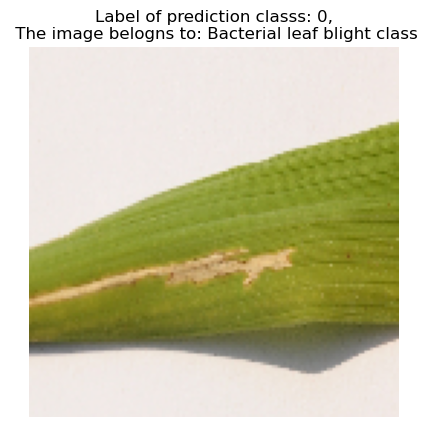

In [39]:
path ="C:/Users/hp/Downloads/data science/Projects/rice leaf pridection/Bactorial_leaf_blight.jpg"
prediction(path)

In [25]:
model.save("../rice leaf pridection/rice_leaf_diseaes.h5")